# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import requests
from time import sleep
from pathlib import Path

# `Citipy` determines cities based on latitude & longitude
from citipy import citipy   # Install using `pip install citipy`

# Personally written functions
# TODO: Add all function names or just run import statement
import gcs_fx as gcs

# Import OpenWeatherMap API Key
from api_keys import weather_api_key

### Generate the Cities List by Using the `citipy` Library

In [2]:
# # Empty list for holding the latitude and longitude combinations
# lat_lngs = []

# # Empty list for holding the cities names
# cities = []

# # Range of latitudes and longitudes
# lat_range = (-90, 90)
# lng_range = (-180, 180)

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500) # TODO: Change back `size = 1500`
# lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500) # TODO: Change back `size = 1500`
# lat_lngs = list(zip(lats, lngs))    # TODO: Correction to allow for later access of coordinates
#                                     # --> Ensure is necessary later

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# print(f"Number of cities in the list: {len(cities)}")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# # Set the API base URL
# # https://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=4312e8b42443141d8193bff21246737e
# # https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude={part}&appid={API key}
# base_url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}'

# # Define an empty list to fetch the weather data for each city
# city_data = []

# # TODO: Define unit measurement system
# units = 'metric'

# # TODO: 'metric' or 'imperial' | kelvin is default -> Del unit query
# # Celcius = Kelvin - 273.15
# # Fahrenheit = (Kelvin - 273.15) x 9/5 + 32 | Includes conv. to Celcius

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters
# record_count = 1
# set_count = 1

# # Loop through all the cities in our list to fetch weather data
# for i, city in enumerate(cities):

#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1    # TODO: starter_code was `record_count = 0` --> Ensure is correct

#     # Create endpoint URL with each city
#     city_url = f'{base_url}&q={city}&units={units}'

#     # Log the url, record, and set numbers
#     # TODO: Clean old print-->"Processing Record %s of Set %s | %s" % (record_count, set_count, city)
#     print(f'Processing Record {record_count} of Set {set_count} | {city}')

#     # Add 1 to the record count
#     record_count += 1

#     # Run an API request for each of the cities
#     try:
#         response = requests.get(city_url).json()

#         # Parse the JSON and retrieve data
#         city_weather = response['weather']

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#         city_lat = response['coord']['lat']
#         city_lng = response['coord']['lon']
#         city_max_temp = response['main']['temp_max']
#         city_humidity = response['main']['humidity']
#         city_clouds = response['clouds']['all']
#         city_wind = response['wind']['speed']
#         city_country = response['sys']['country']
#         city_date = response['dt']

#         # Append the City information into city_data list
#         city_data.append({"City": city,
#                         "Lat": city_lat,
#                         "Lng": city_lng,
#                         "Max Temp": city_max_temp,
#                         "Humidity": city_humidity,
#                         "Cloudiness": city_clouds,
#                         "Wind Speed": city_wind,
#                         "Country": city_country,
#                         "Date": city_date})

#     # If an error is experienced, skip the city
#     except:
#         print("City not found. Skipping...")
#         pass

#     # pause to avoid rate limiting
#     sleep(1)

# # Indicate that Data Loading is complete
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [4]:
# # Convert the cities weather data into a Pandas DataFrame
# cityData_df = pd.DataFrame(city_data)

# # Show Record Count
# cityData_df.count()

In [5]:
# # Display sample data
# cityData_df.head()

In [6]:
# # Export the City_Data into a csv
# # NOTE: `df.to_csv()`` and other `.to_file()` methods takes OS independent regex
# # However, `Path` objects are useful for checking directory requirements
# outPath = Path('output_data')
# if not outPath.exists():
#     Path.mkdir('output_data')
#     print(f'New directory {outPath.name} created.')
# cityData_df.to_csv('output_data/cities.csv', index_label = 'City_ID')
# print(f'CSV file successfully saved')

In [7]:
# Read saved data
cityData_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
cityData_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gabane,-24.6667,25.7822,22.29,72,92,1.69,BW,1735604830
1,mayo-belwa,9.0500,12.0500,22.46,24,70,0.99,NG,1735604832
2,grytviken,-54.2811,-36.5092,5.85,79,54,3.07,GS,1735604833
3,ushuaia,-54.8000,-68.3000,8.81,100,100,1.54,AR,1735604588
4,hamilton,39.1834,-84.5333,8.90,78,0,3.09,US,1735604406


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

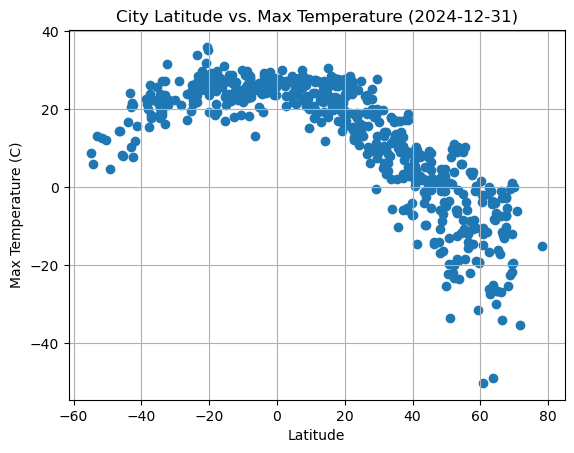

| PyPlot flushed:
| File saved successfully as Fig1_Lat_Temp.


In [8]:
# Build scatter plot for latitude vs. temperature
gcs.s_plot(cityData_df, 'Lat', 'Max Temp')

# Save the figure and show the plot
gcs.flush('Fig1_Lat_Temp')

#### Latitude Vs. Humidity

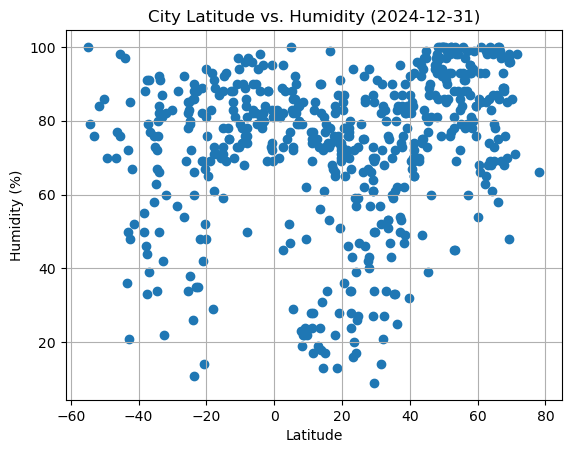

| PyPlot flushed:
| File saved successfully as Fig2_Lat_Humid.


In [9]:
# Build the scatter plots for latitude vs. humidity
gcs.s_plot(cityData_df, 'Lat', 'Humidity')

# Save and show the figure
gcs.flush('Fig2_Lat_Humid')

#### Latitude Vs. Cloudiness

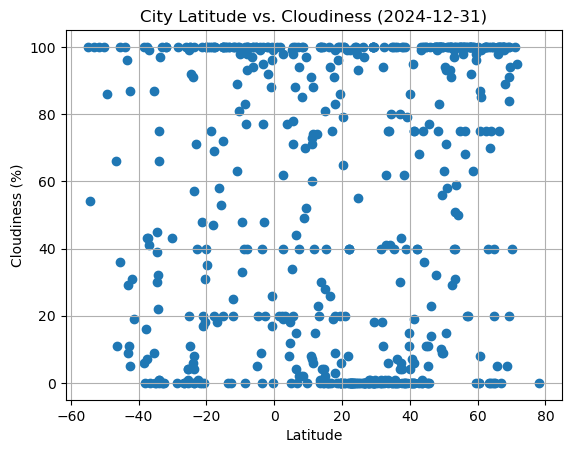

| PyPlot flushed:
| File saved successfully as Fig3_Lat_Clouds.


In [10]:
# Build the scatter plots for latitude vs. cloudiness
gcs.s_plot(cityData_df, 'Lat', 'Cloudiness')

# Save and show the figure
gcs.flush('Fig3_Lat_Clouds')

#### Latitude vs. Wind Speed Plot

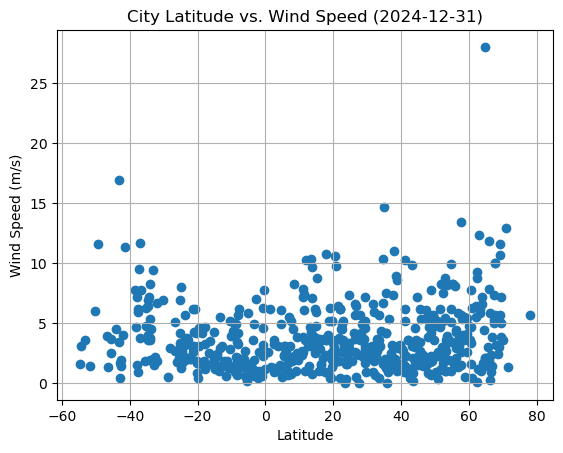

| PyPlot flushed:
| File saved successfully as Fig4_Lat_Wind.


In [11]:
# Build the scatter plots for latitude vs. wind speed
gcs.s_plot(cityData_df, 'Lat', 'Wind Speed')

# Save and show the figure
gcs.flush('Fig4_Lat_Wind')

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
hemi_north_df = cityData_df.loc[cityData_df['Lat'] >= 0, :]

# Display sample data
hemi_north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mayo-belwa,9.0500,12.0500,22.46,24,70,0.99,NG,1735604832
4,hamilton,39.1834,-84.5333,8.90,78,0,3.09,US,1735604406
6,jamestown,42.0970,-79.2353,2.79,96,40,3.58,US,1735604715
7,brookings,44.3114,-96.7984,1.14,97,100,3.60,US,1735604839
8,nantucket,41.2835,-70.0995,8.41,93,0,6.17,US,1735604840


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
hemi_south_df = cityData_df.loc[cityData_df['Lat'] < 0, :]

# Display sample data
hemi_south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gabane,-24.6667,25.7822,22.29,72,92,1.69,BW,1735604830
2,grytviken,-54.2811,-36.5092,5.85,79,54,3.07,GS,1735604833
3,ushuaia,-54.8000,-68.3000,8.81,100,100,1.54,AR,1735604588
5,waitangi,-43.9535,-176.5597,16.57,97,100,4.47,NZ,1735604836
10,touros,-5.1989,-35.4608,26.74,79,5,5.84,BR,1735604843


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7371875859511748


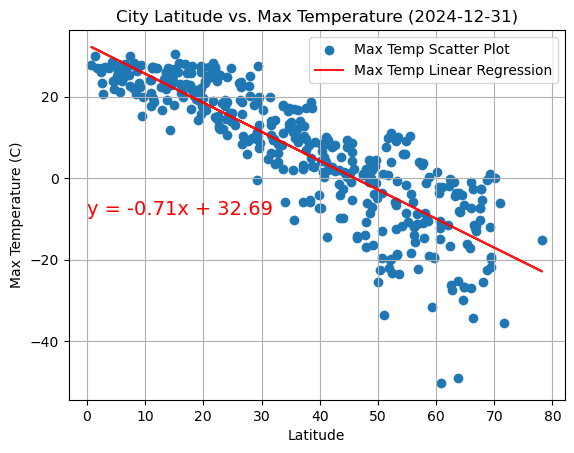

| PyPlot flushed:
| Be advised - not saving


In [34]:
# Linear regression on Northern Hemisphere
gcs.r_plot(hemi_north_df, 'Lat', 'Max Temp', (0, -9))
gcs.flush()

The r^2-value is: 0.3553962084157189


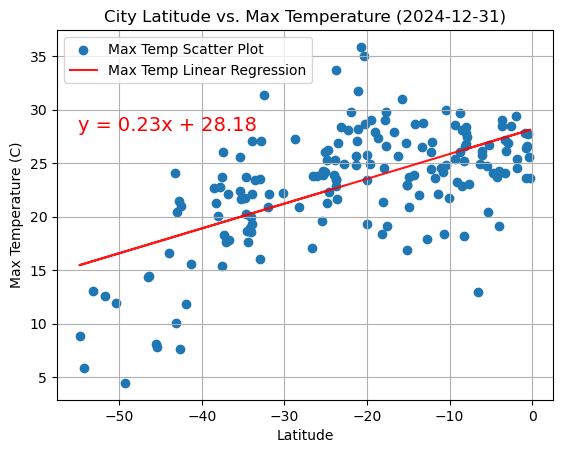

| PyPlot flushed:
| Be advised - not saving


In [33]:
# Linear regression on Southern Hemisphere
gcs.r_plot(hemi_south_df, 'Lat', 'Max Temp', (-55, 28))
gcs.flush()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.16036953925467462


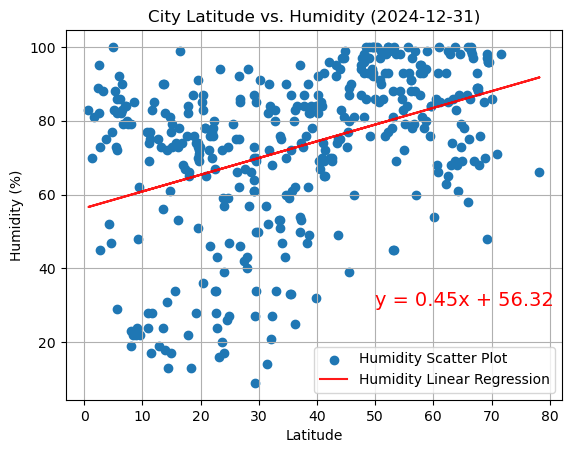

| PyPlot flushed:
| Be advised - not saving


In [32]:
# Northern Hemisphere
gcs.r_plot(hemi_north_df, 'Lat', 'Humidity', (50, 30))
gcs.flush()

The r^2-value is: 0.06879204392384305


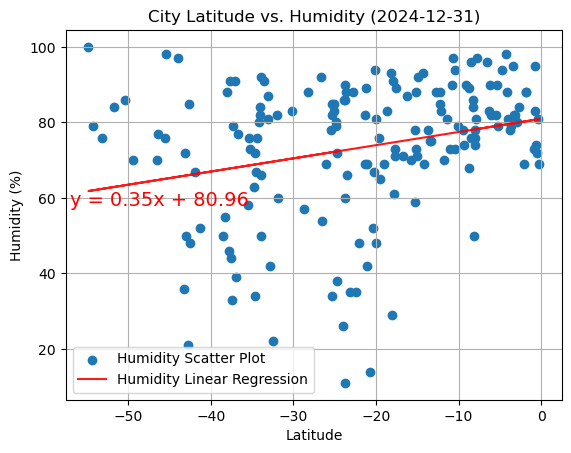

| PyPlot flushed:
| Be advised - not saving


In [31]:
# Southern Hemisphere
gcs.r_plot(hemi_south_df, 'Lat', 'Humidity', (-57, 58))
gcs.flush()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.08542805610023353


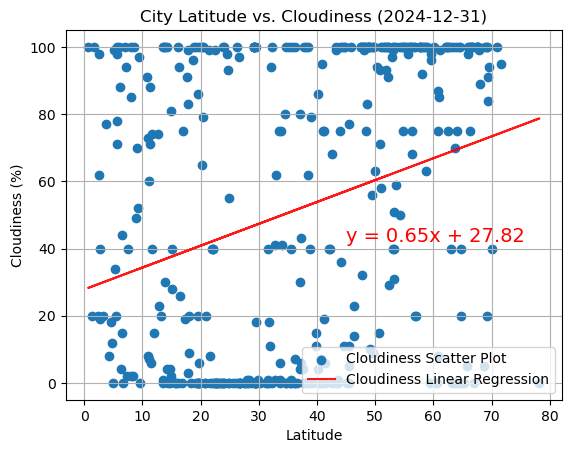

| PyPlot flushed:
| Be advised - not saving


In [30]:
# Northern Hemisphere
gcs.r_plot(hemi_north_df, 'Lat', 'Cloudiness', (45, 42))
gcs.flush()

The r^2-value is: 0.043618882259753154


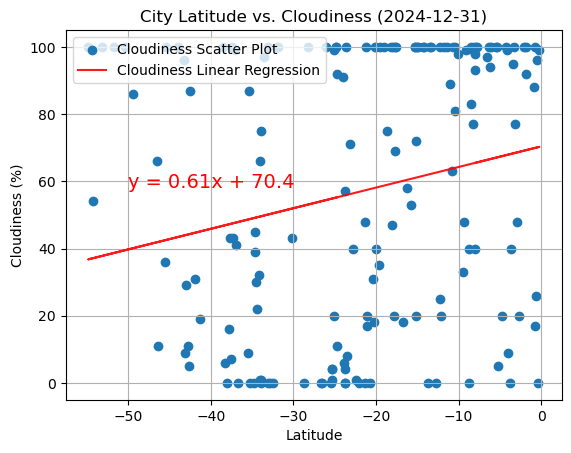

| PyPlot flushed:
| Be advised - not saving


In [29]:
# Southern Hemisphere
gcs.r_plot(hemi_south_df, 'Lat', 'Cloudiness', (-50, 58))
gcs.flush()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.03242328731373693


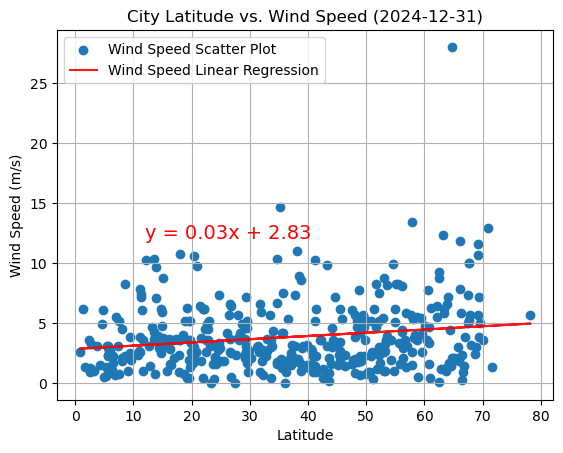

| PyPlot flushed:
| Be advised - not saving


In [36]:
# Northern Hemisphere
gcs.r_plot(hemi_north_df, 'Lat', 'Wind Speed', (12, 12))
gcs.flush()

The r^2-value is: 0.11149351263321555


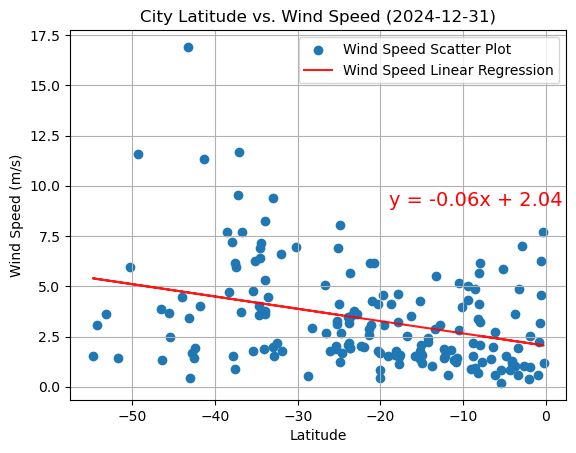

| PyPlot flushed:
| Be advised - not saving


In [38]:
# Southern Hemisphere
gcs.r_plot(hemi_south_df, 'Lat', 'Wind Speed', (-19, 9))
gcs.flush()

**Discussion about the linear relationship:** YOUR RESPONSE HERE